In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd

In [2]:
path = Path('/home/jupyter/.fastai/data/food-101/food-101')
path.ls()

[PosixPath('/home/jupyter/.fastai/data/food-101/food-101/README.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/part-train-seed47.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/images'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/license_agreement.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/meta'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/total.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/models')]

In [3]:
df_train_total = pd.read_csv(path/'train.csv')
df_train_total.head()

,fn,label
0,apple_pie/1005649.jpg,apple_pie
1,apple_pie/1014775.jpg,apple_pie
2,apple_pie/1026328.jpg,apple_pie
3,apple_pie/1028787.jpg,apple_pie
4,apple_pie/1043283.jpg,apple_pie


In [4]:
df_test = pd.read_csv(path/'test.csv')
df_test.head()

,fn,label
0,apple_pie/1011328.jpg,apple_pie
1,apple_pie/101251.jpg,apple_pie
2,apple_pie/1034399.jpg,apple_pie
3,apple_pie/103801.jpg,apple_pie
4,apple_pie/1038694.jpg,apple_pie


In [24]:
df_train_partial = df_train_total.groupby('label',group_keys=False).apply(lambda x: x.sample(frac=0.8,random_state=47))
df_train_partial.head()

,fn,label
341,apple_pie/2651801.jpg,apple_pie
528,apple_pie/3428446.jpg,apple_pie
452,apple_pie/3021995.jpg,apple_pie
407,apple_pie/2851371.jpg,apple_pie
714,apple_pie/871917.jpg,apple_pie


In [25]:
750 * 0.8

600.0

In [26]:
df_train_partial[df_train_partial['label']=='takoyaki'].count()

fn       600
label    600
dtype: int64

In [27]:
df_valid = pd.concat([df_train_total,df_train_partial]).drop_duplicates(keep=False)

In [29]:
df_valid.count()

fn       15150
label    15150
dtype: int64

In [30]:
df_train_partial.count()

fn       60600
label    60600
dtype: int64

In [31]:
df_train_total.count()

fn       75750
label    75750
dtype: int64

In [32]:
df_train_partial['is_valid'] = 0

In [33]:
df_valid['is_valid'] = 1

In [34]:
df = pd.concat([df_train_partial,df_valid])
df[df['is_valid']==1].count()

fn          15150
label       15150
is_valid    15150
dtype: int64

In [35]:
df[df['is_valid']==0].count()

fn          60600
label       60600
is_valid    60600
dtype: int64

In [36]:
df.to_csv('total-train-20split-seed47.csv',index=False)

In [37]:
!mv /home/jupyter/dl_related/fellowship/total-train-20split-seed47.csv {path}

In [39]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/food-101/food-101/README.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/part-train-seed47.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/images'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/license_agreement.txt'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/meta'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/total.csv'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/models'),
 PosixPath('/home/jupyter/.fastai/data/food-101/food-101/total-train-20split-seed47.csv')]

In [41]:
data = (ImageList
        .from_csv(path,'total-train-20split-seed47.csv',folder='images')
        .split_from_df(col='is_valid')
        .label_from_df(cols='label')
        .transform(get_transforms(),size=224)
        .add_test(ImageList.from_df(df_test,path=path/'images',cols='fn'))
        .databunch(bs=64,num_workers=8)
        .normalize(imagenet_stats)
)

In [44]:
data

ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/food-101;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/food-101;

Test: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/food-101/food-101

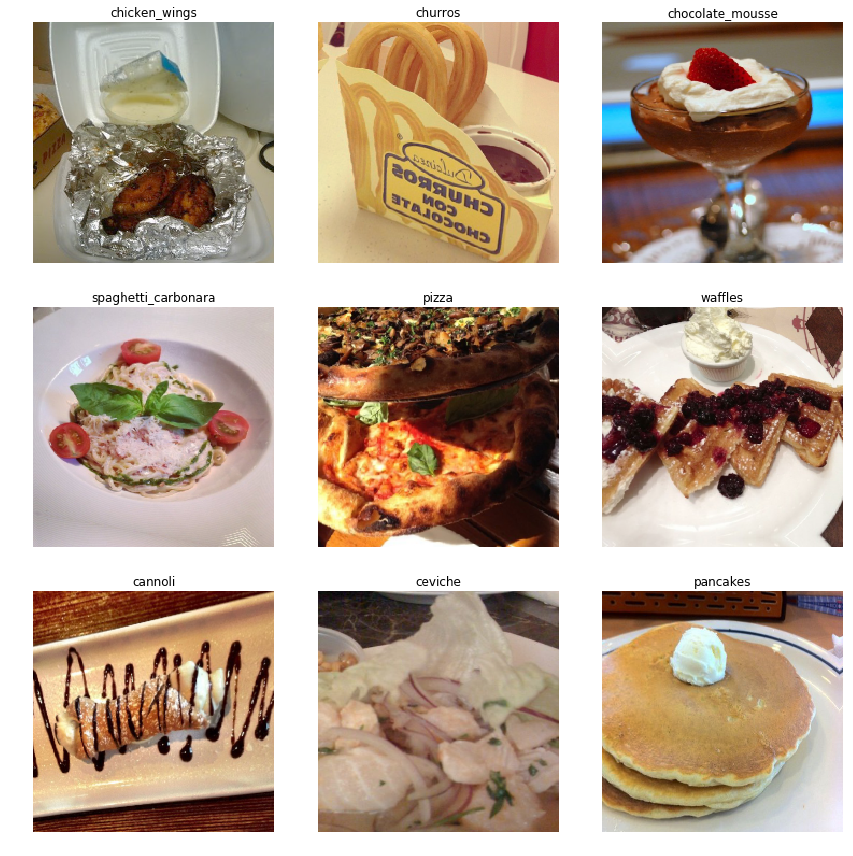

In [45]:
data.show_batch(rows=3)

In [46]:
learn = cnn_learner(data,models.resnet50,metrics=[accuracy,top_k_accuracy])

Since I already trained one with half the dataset, no need to start training with imagenet pre-trained weights

Start with previous model with 81% accuracy

In [47]:
learn.load('res50-stage-2-224-seed47')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/food-101;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/food-101;

Test: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/jupyter/.fastai/data/food-101/food-101, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(

In [48]:
learn.freeze_to(-1)

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 9.12E-08


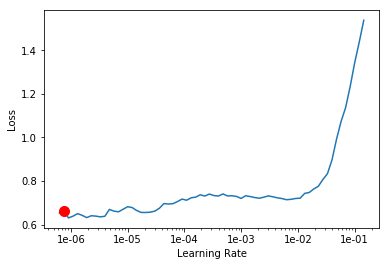

In [51]:
learn.recorder.plot(suggestion=True)

In [52]:
lr = 1e-3

In [53]:
learn.fit_one_cycle(6,slice(lr))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,0.710791,0.930926,0.766535,0.926337,04:42
1,0.712291,0.903986,0.767723,0.927525,04:44
2,0.714442,0.889780,0.769109,0.930231,04:44
3,0.650227,0.885356,0.770429,0.930495,04:44
4,0.648781,0.881424,0.770957,0.931155,04:44
5,0.606912,0.878710,0.772013,0.930297,04:44


In [54]:
learn.save('res50-stage-1-224-final')

In [55]:
learn.unfreeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-06
Min loss divided by 10: 4.37E-06


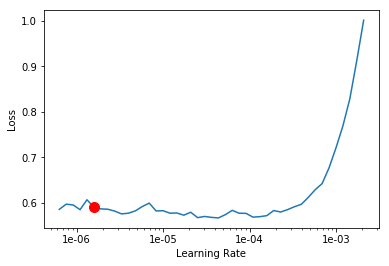

In [58]:
learn.recorder.plot(suggestion=True,skip_end=10)

In [59]:
learn.fit_one_cycle(10,slice(1e-5/2,lr/5))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,0.631431,0.880841,0.772805,0.931419,05:42
1,0.671908,0.901155,0.768317,0.930759,05:42
2,0.677474,0.896159,0.772607,0.929901,05:42
3,0.582867,0.877598,0.775182,0.931617,05:43
4,0.485184,0.869187,0.782904,0.935248,05:42
5,0.399464,0.872604,0.783762,0.933465,05:42
6,0.317149,0.864304,0.790693,0.935380,05:42
7,0.273710,0.870317,0.792937,0.936238,05:42
8,0.218796,0.862430,0.796436,0.935974,05:42
9,0.218729,0.862243,0.796700,0.935578,05:42


In [60]:
learn.save('res50-stage-2-224-final')

In [61]:
preds = learn.TTA(ds_type=DatasetType.Test)

In [63]:
preds[0]

tensor([[6.2843e-02, 8.3956e-05, 7.6371e-02,  ..., 2.5431e-06, 8.8580e-04,
         2.0587e-05],
        [7.5142e-01, 1.4643e-04, 1.1330e-02,  ..., 3.5839e-05, 2.4507e-05,
         2.5289e-05],
        [1.6768e-01, 3.1849e-04, 2.1164e-01,  ..., 1.4646e-05, 3.0633e-04,
         1.3139e-02],
        ...,
        [2.5290e-02, 8.1243e-04, 1.6110e-05,  ..., 1.4772e-04, 1.2597e-04,
         1.2182e-01],
        [3.8835e-03, 4.0131e-05, 3.2252e-05,  ..., 6.1601e-04, 2.7715e-07,
         8.0239e-01],
        [3.1265e-02, 2.3200e-04, 2.6849e-04,  ..., 2.9041e-04, 8.9600e-05,
         8.8076e-01]])

In [67]:
pred = torch.argmax(preds[0],dim=1)

In [68]:
pred.shape

torch.Size([25250])

In [71]:
df_test.head()

,fn,label
0,apple_pie/1011328.jpg,apple_pie
1,apple_pie/101251.jpg,apple_pie
2,apple_pie/1034399.jpg,apple_pie
3,apple_pie/103801.jpg,apple_pie
4,apple_pie/1038694.jpg,apple_pie


In [73]:
learn.data.test_ds.x.items

array(['/home/jupyter/.fastai/data/food-101/food-101/images/apple_pie/1011328.jpg',
       '/home/jupyter/.fastai/data/food-101/food-101/images/apple_pie/101251.jpg',
       '/home/jupyter/.fastai/data/food-101/food-101/images/apple_pie/1034399.jpg',
       '/home/jupyter/.fastai/data/food-101/food-101/images/apple_pie/103801.jpg', ...,
       '/home/jupyter/.fastai/data/food-101/food-101/images/waffles/954028.jpg',
       '/home/jupyter/.fastai/data/food-101/food-101/images/waffles/96181.jpg',
       '/home/jupyter/.fastai/data/food-101/food-101/images/waffles/97015.jpg',
       '/home/jupyter/.fastai/data/food-101/food-101/images/waffles/971843.jpg'], dtype='<U88')

In [78]:
pred[:20]

tensor([ 85,   0,  67,   0,   0,   0,  23,   0,   0,  41,   0,   0,   0,   0,
          0, 100,   0,   0,   0,   0])

In [80]:
df_test.head()

,fn,label
0,apple_pie/1011328.jpg,apple_pie
1,apple_pie/101251.jpg,apple_pie
2,apple_pie/1034399.jpg,apple_pie
3,apple_pie/103801.jpg,apple_pie
4,apple_pie/1038694.jpg,apple_pie


In [89]:
Path(learn.data.test_ds.x.items[0]).parent.name

'apple_pie'

In [91]:
data.classes.index(Path(learn.data.test_ds.x.items[0]).parent.name)

0

In [92]:
len(learn.data.test_ds.x.items)

25250

In [94]:
def prepare_output(learn):
    ground_truth = []
    for item in learn.data.test_ds.x.items:
        ground_truth.append(data.classes.index(Path(item).parent.name))
    return ground_truth

In [95]:
gt = prepare_output(learn)

In [106]:
accuracy(preds[0],tensor(gt))

tensor(0.8556)

In [107]:
top_k_accuracy(preds[0],tensor(gt))

tensor(0.9686)